In [1]:
import ppuu.lightning_modules.policy
import ppuu.lightning_modules.policy.mpur_km
import ppuu.train_policy
import ppuu.costs.policy_costs_km
import imp
imp.reload(ppuu.lightning_modules)
imp.reload(ppuu.lightning_modules.policy)
imp.reload(ppuu.lightning_modules.policy.mpur_km)
imp.reload(ppuu.train_policy)
imp.reload(ppuu.costs.policy_costs_km)
Module = ppuu.lightning_modules.policy.MPURKMTaperV3Module

In [2]:
import random

config = Module.Config()
config.model_config.model_type = 'km_taper_v3'
# config.model_config.model_type = 'vanilla'
config.training_config.set_dataset('50')
config.training_config.epoch_size = 10
config.training_config.n_epochs = 0
config.training_config.n_iter = 0
config.training_config.seed = random.randint(0, 1000)
config.training_config.batch_size = 1
config.training_config.validation_size = 10
config.training_config.output_dir = '/home/us441/vlad/garbage'
config.cost_config.u_reg = 0.0
config.cost_config.uncertainty_n_batches = 10 
model = ppuu.train_policy.main(config)
model.cuda()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


auto set n_epochs to 50000


initializing ddp: GLOBAL_RANK: 0, MEMBER: 1/1
wandb: Currently logged in as: vlads (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.10 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade



  | Name          | Type                | Params
------------------------------------------------------
0 | forward_model | ForwardModelV3      | 15 M  
1 | policy_model  | DeterministicPolicy | 6 M   
INFO:lightning:
  | Name          | Type                | Params
------------------------------------------------------
0 | forward_model | ForwardModelV3      | 15 M  
1 | policy_model  | DeterministicPolicy | 6 M   
/home/us441/vlad/miniconda3/envs/forked_2/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 44 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/home/us441/vlad/miniconda3/envs/forked_2/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, val dataloader 0, d

[estimating normal uncertainty ranges: 100.0%]
pygame 2.0.0.dev6 (SDL 2.0.10, python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/us441/vlad/miniconda3/envs/forked_2/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


Cls(
  (forward_model): ForwardModelV3(
    (module): FM(
      (model): FwdCNNKMNoAction_VAE(
        (encoder): Encoder(
          (f_encoder): Sequential(
            (0): Conv2d(60, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
            (1): Dropout2d(p=0.0, inplace=True)
            (2): LeakyReLU(negative_slope=0.2, inplace=True)
            (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
            (4): Dropout2d(p=0.0, inplace=True)
            (5): LeakyReLU(negative_slope=0.2, inplace=True)
            (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          )
          (s_encoder): Sequential(
            (0): Linear(in_features=100, out_features=256, bias=True)
            (1): Dropout(p=0.0, inplace=True)
            (2): LeakyReLU(negative_slope=0.2, inplace=True)
            (3): Linear(in_features=256, out_features=256, bias=True)
            (4): Dropout(p=0.0, inplace=True)
            (5): LeakyReLU(negat

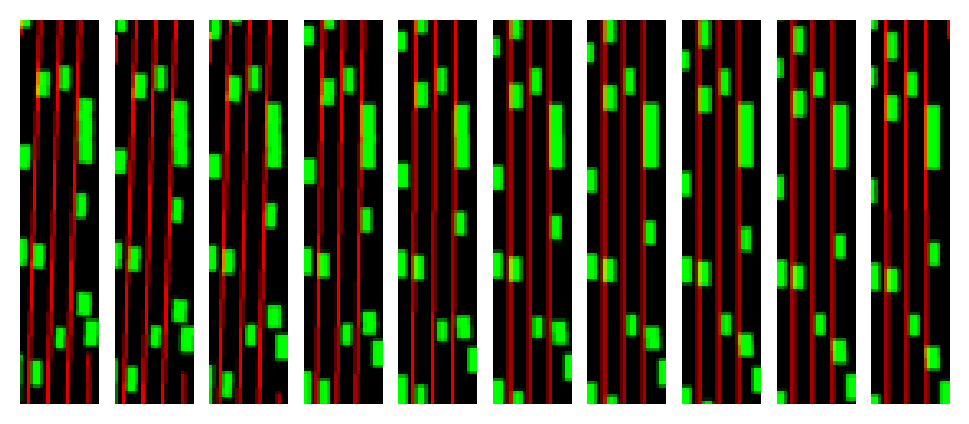

In [3]:
import torch
import numpy as np
from matplotlib import pyplot as plt

def plot_images(images):
    images = images.detach().cpu().numpy()
    step = max(images.shape[1] // 10, 1)
    l = images.shape[1] // step
    f, axs = plt.subplots(1, l, dpi=200)
    for i in range(max(l, 1)):
        image = np.transpose(images[0][i * step], (1, 2, 0))
        if l == 1:
            axs.imshow(image)
            axs.set_axis_off()
        else:
            axs[i].imshow(image)
            axs[i].set_axis_off()
            

train_dataloader = model.train_dataloader()

batch = next(iter(train_dataloader))
while  batch['actions'][:, :, -1].mean().abs() > 0.3:
    batch = next(iter(train_dataloader))

plot_images(batch['target_images'])

for k in batch:
    if torch.is_tensor(batch[k]):
        batch[k] = batch[k].cuda()

In [4]:
model.cuda()

Cls(
  (forward_model): ForwardModelV3(
    (module): FM(
      (model): FwdCNNKMNoAction_VAE(
        (encoder): Encoder(
          (f_encoder): Sequential(
            (0): Conv2d(60, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
            (1): Dropout2d(p=0.0, inplace=True)
            (2): LeakyReLU(negative_slope=0.2, inplace=True)
            (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
            (4): Dropout2d(p=0.0, inplace=True)
            (5): LeakyReLU(negative_slope=0.2, inplace=True)
            (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          )
          (s_encoder): Sequential(
            (0): Linear(in_features=100, out_features=256, bias=True)
            (1): Dropout(p=0.0, inplace=True)
            (2): LeakyReLU(negative_slope=0.2, inplace=True)
            (3): Linear(in_features=256, out_features=256, bias=True)
            (4): Dropout(p=0.0, inplace=True)
            (5): LeakyReLU(negat

In [5]:
predictions = model.forward_model.unfold(model.policy_model, batch)

In [6]:
batch['actions']

tensor([[[ 0.4276,  0.1959],
         [ 0.2795,  0.0873],
         [ 0.1637,  0.0463],
         [-0.1352, -0.0189],
         [-0.4959, -0.1356],
         [-0.8396, -0.2480],
         [-1.3072, -0.3523],
         [-1.5385, -0.5052],
         [-1.4347, -0.4721],
         [-1.0439, -0.4655],
         [-0.6909, -0.4312],
         [-0.4832, -0.4605],
         [-0.3676, -0.4895],
         [-0.0285, -0.4356],
         [ 0.2669, -0.2905],
         [ 0.7840, -0.1898],
         [ 1.0371, -0.0691],
         [ 1.0943,  0.0072],
         [ 1.1432, -0.0188],
         [ 1.0888, -0.0157],
         [ 1.0888, -0.0173],
         [ 1.1377, -0.0167],
         [ 1.1839, -0.0138],
         [ 0.9503, -0.0132],
         [ 0.3905, -0.0019],
         [-0.0442, -0.0324],
         [-0.2724, -0.0738],
         [-0.1038, -0.1151],
         [ 0.0315,  0.1396],
         [ 0.0480,  0.2368]]], device='cuda:0')

In [7]:
predictions['pred_actions'].retain_grad()
masks = model.policy_cost.get_masks(predictions['pred_images'], predictions['pred_states'], predictions['pred_actions'], batch['car_sizes'], True)

# masks = model.policy_cost.get_masks(batch['target_images'], batch['target_states'], batch['actions'], batch['car_sizes'], True)

In [8]:
masks[0].shape
masks.sum().backward()

In [9]:
predictions['pred_actions'].grad

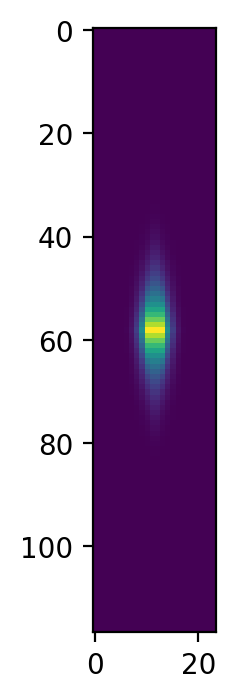

In [10]:
from matplotlib import pyplot as plt
plt.figure(dpi=200)
plt.imshow(masks[0][3].detach().cpu())

In [11]:
overlaid = batch['target_images'] + 0.7 * masks.unsqueeze(2)

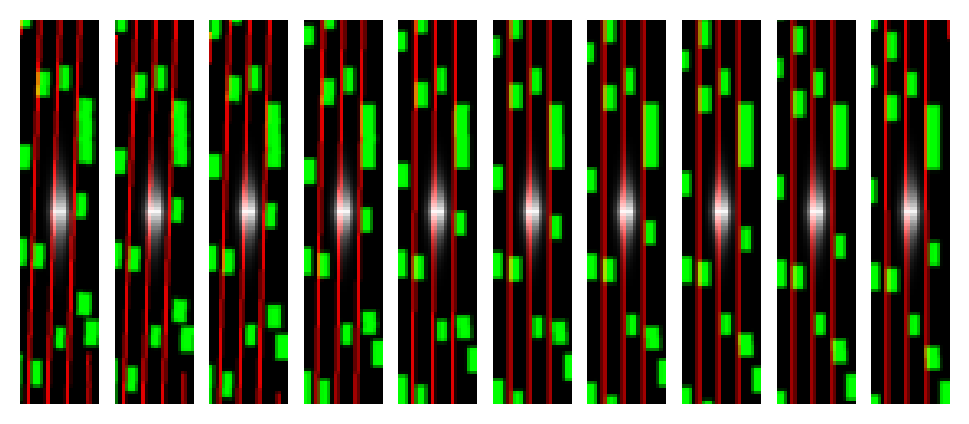

In [12]:
plot_images(overlaid)

In [13]:
batch['actions']
batch['input_states']

tensor([[[-0.3219,  0.7777,  0.2860,  0.2613,  0.8359],
         [-0.3020,  0.7779,  0.2860,  0.2613,  0.8399],
         [-0.2821,  0.7781,  0.2860,  0.2620,  0.8418],
         [-0.2622,  0.7783,  0.2860,  0.2633,  0.8413],
         [-0.2422,  0.7785,  0.2861,  0.2607,  0.8331],
         [-0.2224,  0.7786,  0.2858,  0.2685,  0.8166],
         [-0.2026,  0.7788,  0.2857,  0.2723,  0.7906],
         [-0.1829,  0.7791,  0.2853,  0.2853,  0.7627],
         [-0.1634,  0.7794,  0.2858,  0.2680,  0.7410],
         [-0.1440,  0.7796,  0.2865,  0.2121,  0.7301],
         [-0.1247,  0.7795,  0.2833,  0.1183,  0.7273],
         [-0.1054,  0.7791,  0.2708, -0.0099,  0.7335],
         [-0.0860,  0.7780,  0.2393, -0.1802,  0.7450],
         [-0.0666,  0.7762,  0.1958, -0.3357,  0.7600],
         [-0.0471,  0.7737,  0.1446, -0.4758,  0.7826],
         [-0.0275,  0.7706,  0.0848, -0.6097,  0.8135],
         [-0.0077,  0.7668,  0.0151, -0.7429,  0.8551],
         [ 0.0123,  0.7624, -0.0684, -0.8813,  0

# Made up data to make sure the gradient pushes the values in the right direction

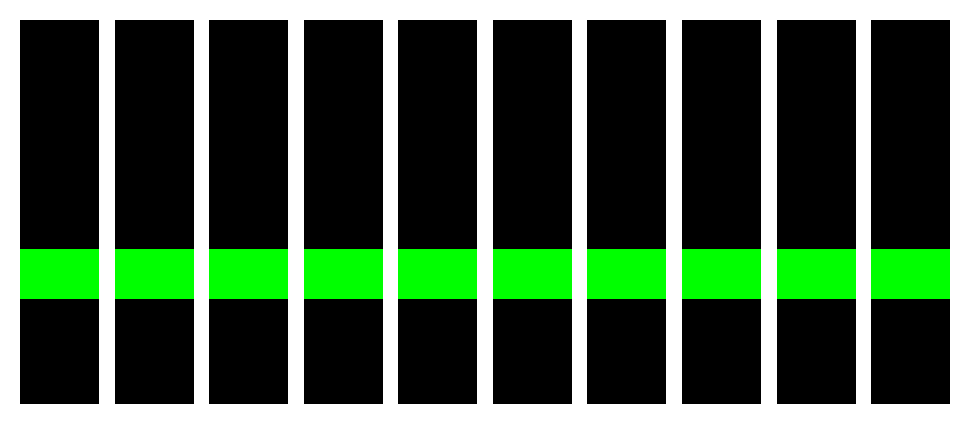

In [29]:
cnd_car_in_front = torch.zeros_like(batch['input_images'])
target_car_in_front = torch.zeros_like(batch['target_images'])

# car_slice = slice(13, 20) # to the right
# car_slice = slice(4, 11) # to the left
car_slice = slice(0, 24)
car_slice_x = slice(70, 85) # behind
# car_slice_x = slice(20, 35) # in front
# car_slice_x = slice(0, 117) # everywhere
cnd_car_in_front[:, :, 1, car_slice_x, car_slice] = 1
target_car_in_front[:, :, 1, car_slice_x, car_slice] = 1
plot_images(cnd_car_in_front)

In [30]:
car_in_front_states =  torch.tensor(
       [[[-0.8183,  0.7974,  0.2860,  0.2615,  0.3514],
         [-0.8010,  0.7976,  0.2859,  0.2678,  0.3547],
         [-0.7836,  0.7978,  0.2857,  0.2757,  0.3544],
         [-0.7662,  0.7980,  0.2854,  0.2828,  0.3532],
         [-0.7488,  0.7982,  0.2851,  0.2891,  0.3519],
         [-0.7314,  0.7985,  0.2848,  0.2970,  0.3516],
         [-0.7140,  0.7988,  0.2845,  0.3041,  0.3543],
         [-0.6967,  0.7991,  0.2842,  0.3117,  0.3640],
         [-0.6792,  0.7995,  0.2839,  0.3168,  0.3788],
         [-0.6617,  0.7999,  0.2837,  0.3188,  0.3916],
         [-0.6441,  0.8003,  0.2839,  0.3171,  0.3977],
         [-0.6265,  0.8006,  0.2839,  0.3163,  0.3978],
         [-0.6089,  0.8010,  0.2840,  0.3148,  0.3961],
         [-0.5913,  0.8014,  0.2840,  0.3140,  0.3960],
         [-0.5737,  0.8018,  0.2840,  0.3132,  0.3959],
         [-0.5561,  0.8021,  0.2830,  0.3319,  0.3963],
         [-0.5385,  0.8026,  0.2857,  0.2750,  0.3971],
         [-0.5208,  0.8028,  0.2862,  0.1893,  0.3971],
         [-0.5032,  0.8027,  0.2759,  0.0318,  0.3973],
         [-0.4856,  0.8019,  0.2625, -0.0645,  0.4005]]], device='cuda:0')
# car_in_front_actions = torch.zeros(1, 2, 2).cuda()#.clone().detach()
car_in_front_actions = torch.zeros_like(batch['actions']).clone().detach()
car_in_front_actions.requires_grad = True
car_in_front_actions.retain_grad()

car_in_front_batch = dict(
    input_images=cnd_car_in_front, 
    input_states=car_in_front_states,
    ego_cars=batch['ego_cars'],
    actions=car_in_front_actions,
    car_sizes=batch['car_sizes'],
    stats=batch['stats'],
    ids=batch['ids'],
    target_images=batch['target_images'],
)

In [31]:
NUM_STEPS = 100
# NUM_STEPS = 1

optimizer = torch.optim.SGD((car_in_front_actions,), lr=1e-1)
# optimizer = optimizer.cuda()
proximity_costs = []
gradients = []
gradients_turn = []
images = []
actions = []
actions_turn = []

# car_in_front_actions[:, :, 0].fill_(20.)

for i in range(NUM_STEPS):
    car_in_front_predictions = model.forward_model.unfold(car_in_front_actions, car_in_front_batch)
#     car_in_front_predictions = model_vanilla.forward_model.unfold(car_in_front_actions, car_in_front_batch)
    car_in_front_predictions['pred_images'].detach_()
    car_in_front_predictions['pred_actions'] = car_in_front_actions
    
    masks = model.policy_cost.get_masks(car_in_front_predictions['pred_images'], 
                                        car_in_front_predictions['pred_states'],
                                        car_in_front_predictions['pred_actions'], 
                                        car_in_front_batch['car_sizes'],
                                        True)

    loss = model.policy_cost.calculate_cost(batch, car_in_front_predictions)
#     loss = model_vanilla.policy_cost.calculate_cost(batch, car_in_front_predictions)
    
    optimizer.zero_grad()
    loss['proximity_loss'].backward()
#     car_in_front_actions.grad[:, :, 1].zero_()
    gradients.append(car_in_front_actions.grad[:, :, 0].mean())
    gradients_turn.append(car_in_front_actions.grad[:, :, 1].mean())
    actions.append(car_in_front_actions[:, :, 0].mean())
    actions_turn.append(car_in_front_actions[:, :, 1].mean())
    images.append((car_in_front_predictions['pred_images'] + masks.unsqueeze(2)))#[:, 1].unsqueeze(0))
#     images.append((car_in_front_predictions['pred_images']))#[:, 1].unsqueeze(0))
    proximity_costs.append(loss['proximity_loss'].item())
    optimizer.step()
    with torch.no_grad():
        car_in_front_actions.clamp_(-3, 3)

# grad_km = car_in_front_actions.grad.clone()

In [32]:
# images[0].shape
images[0].shape

torch.Size([1, 30, 3, 117, 24])

In [33]:
car_in_front_actions.grad

tensor([[[-1.5760e+00,  7.4658e-01],
         [-1.5016e+00,  7.0082e-01],
         [-1.4356e+00,  6.5782e-01],
         [-1.3680e+00,  5.9448e-01],
         [-1.3032e+00,  5.3837e-01],
         [-1.2461e+00,  4.9186e-01],
         [-1.1878e+00,  4.3805e-01],
         [-1.1440e+00,  5.2842e-01],
         [-1.0862e+00,  4.8352e-01],
         [-1.0322e+00,  4.5228e-01],
         [-9.9529e-01,  5.7047e-01],
         [-9.3555e-01,  5.1130e-01],
         [-8.7162e-01,  4.4601e-01],
         [-7.9928e-01,  3.6021e-01],
         [-7.1971e-01,  2.3071e-01],
         [-6.3583e-01,  8.1550e-02],
         [-5.5526e-01, -6.0410e-02],
         [-4.7890e-01, -1.9521e-01],
         [-4.0897e-01, -3.1659e-01],
         [-3.8471e-01, -2.0602e-01],
         [-3.6109e-01, -9.8335e-02],
         [-3.3512e-01,  1.3741e-02],
         [-2.6898e-01, -7.7872e-02],
         [-2.0484e-01, -1.5451e-01],
         [-1.4370e-01, -2.1947e-01],
         [-1.2514e-01, -8.8668e-02],
         [-7.6958e-02, -1.3052e-01],
 

In [34]:
car_in_front_actions

tensor([[[ 3.0000e+00, -2.5539e+00],
         [ 3.0000e+00, -2.8874e+00],
         [ 3.0000e+00, -3.0000e+00],
         [ 3.0000e+00, -3.0000e+00],
         [ 3.0000e+00, -3.0000e+00],
         [ 3.0000e+00, -2.9335e+00],
         [ 3.0000e+00, -2.8755e+00],
         [ 3.0000e+00, -2.8540e+00],
         [ 3.0000e+00, -2.6642e+00],
         [ 3.0000e+00, -2.4729e+00],
         [ 3.0000e+00, -2.4412e+00],
         [ 3.0000e+00, -2.2934e+00],
         [ 3.0000e+00, -2.2504e+00],
         [ 3.0000e+00, -2.0125e+00],
         [ 3.0000e+00, -1.8588e+00],
         [ 3.0000e+00, -1.6991e+00],
         [ 2.7812e+00, -1.5178e+00],
         [ 2.4609e+00, -1.3833e+00],
         [ 2.1621e+00, -1.2393e+00],
         [ 1.8847e+00, -1.1422e+00],
         [ 1.6252e+00, -9.9177e-01],
         [ 1.3974e+00, -9.2313e-01],
         [ 1.1775e+00, -7.6844e-01],
         [ 9.6743e-01, -6.0680e-01],
         [ 7.7245e-01, -4.9811e-01],
         [ 5.9841e-01, -4.0581e-01],
         [ 4.3428e-01, -3.2465e-01],
 

In [35]:
car_in_front_actions.shape

torch.Size([1, 30, 2])

<ipython-input-36-ac1eb49af460>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(car_in_front_actions[0, :, 0].detach().cpu())


<StemContainer object of 3 artists>

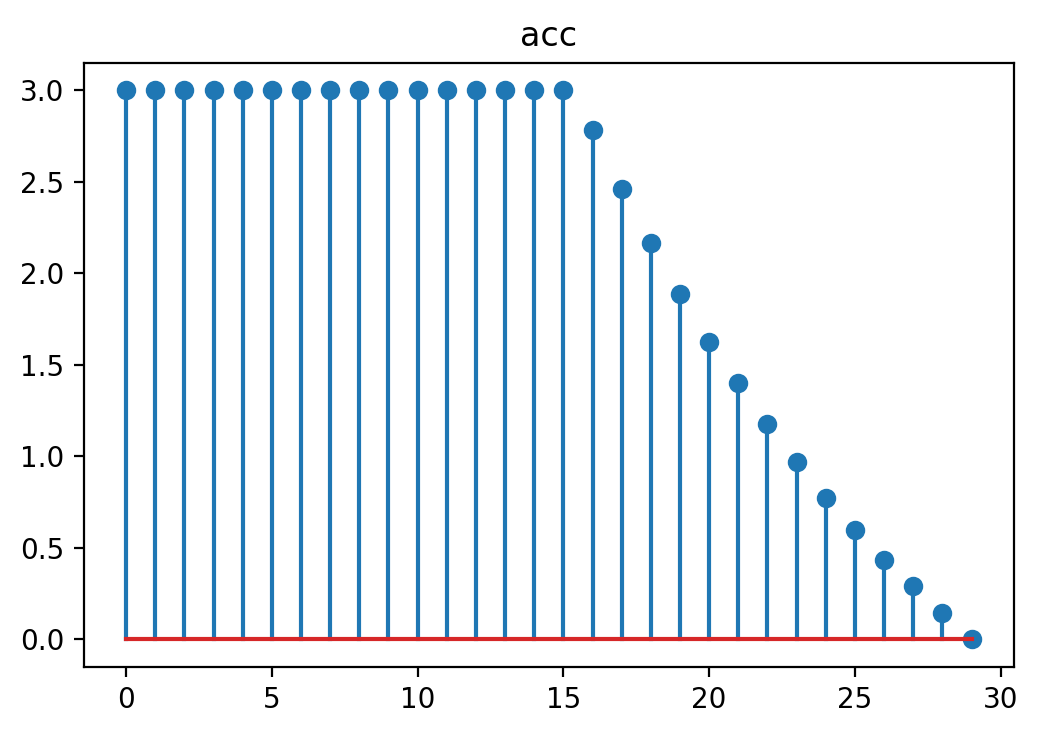

In [36]:
plt.figure(dpi=200)
plt.title('acc')
plt.stem(car_in_front_actions[0, :, 0].detach().cpu())
# plt.stem(car_in_front_actions[0, :, 1].detach().cpu())

<ipython-input-37-d222e823fbf2>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(car_in_front_actions[0, :, 1].detach().cpu())


<StemContainer object of 3 artists>

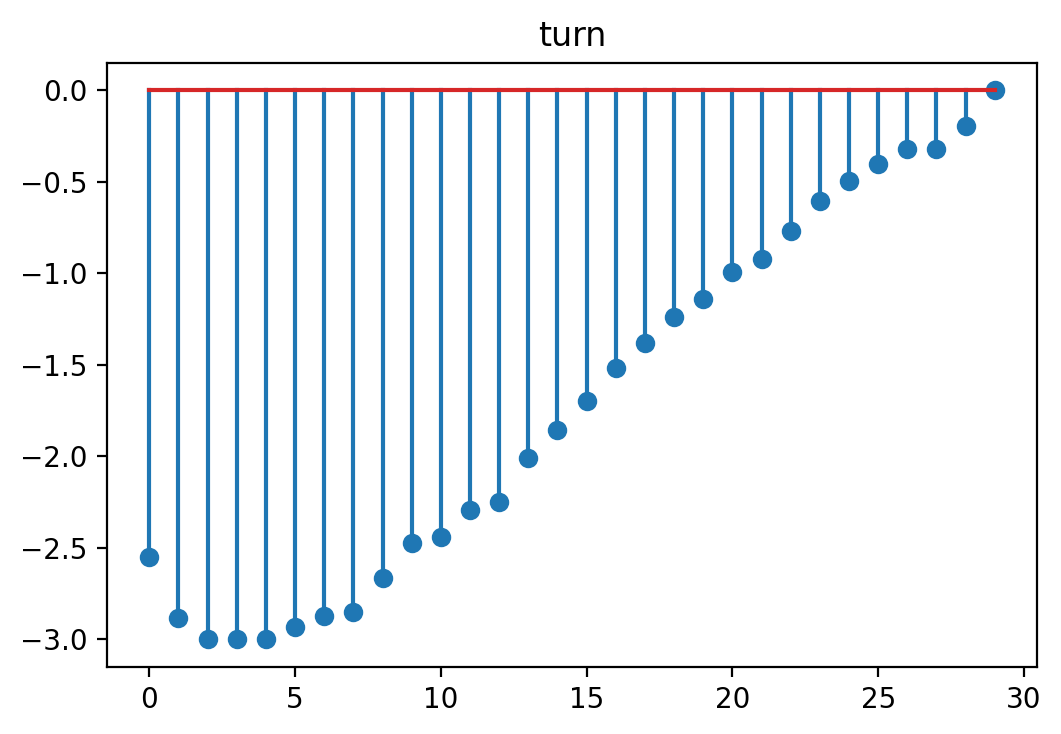

In [37]:
plt.figure(dpi=200)
plt.title('turn')
plt.stem(car_in_front_actions[0, :, 1].detach().cpu())

#TODO:
1. convert to m/s2
2. check what is the mean and std of actions

In [38]:
car_in_front_actions.shape
len(images)
images[0].shape
st_images = torch.cat(images, axis=1)
print(st_images.shape)

torch.Size([1, 3000, 3, 117, 24])


Text(0.5, 1.0, 'acc')

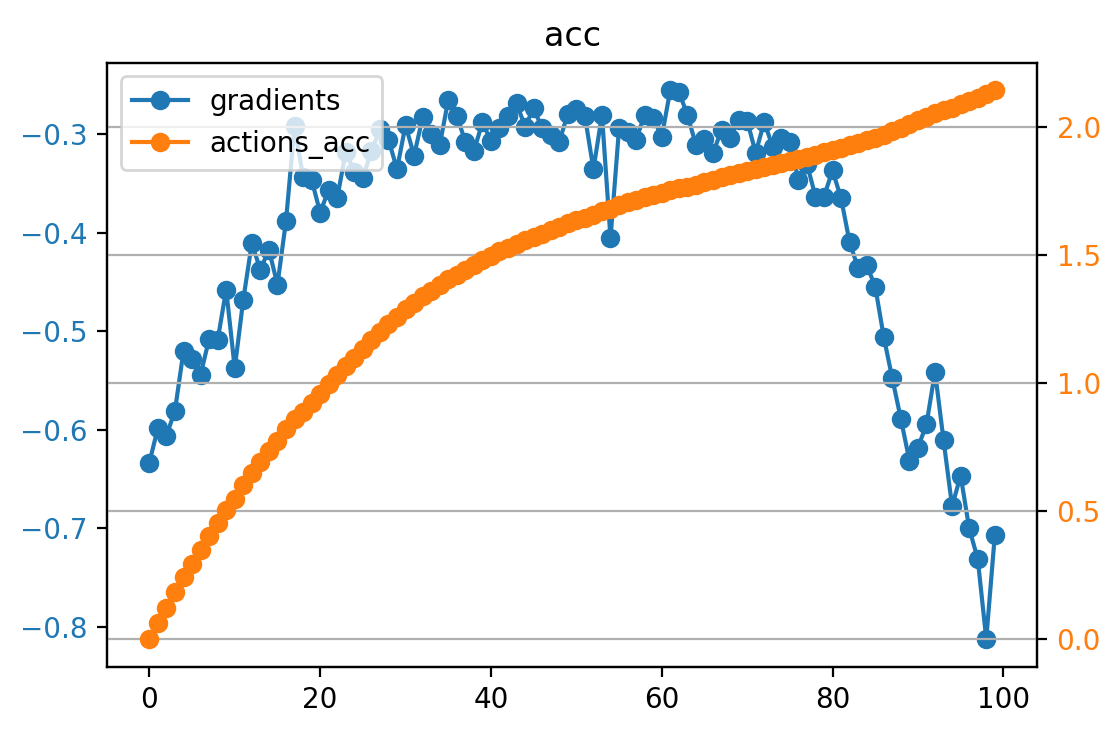

In [39]:
plt.figure(dpi=200)
a, = plt.plot(gradients, 'C0-o', label='gradients')
ax1 = plt.gca()
ax2 = ax1.twinx()
b, = ax2.plot(actions, 'C1-o', label='actions_acc')

ax1.tick_params(axis='y', labelcolor='C0')
ax2.tick_params(axis='y', labelcolor='C1')
plt.grid()
plt.legend(handles=(a, b))

plt.title('acc')

Text(0.5, 1.0, 'turn')

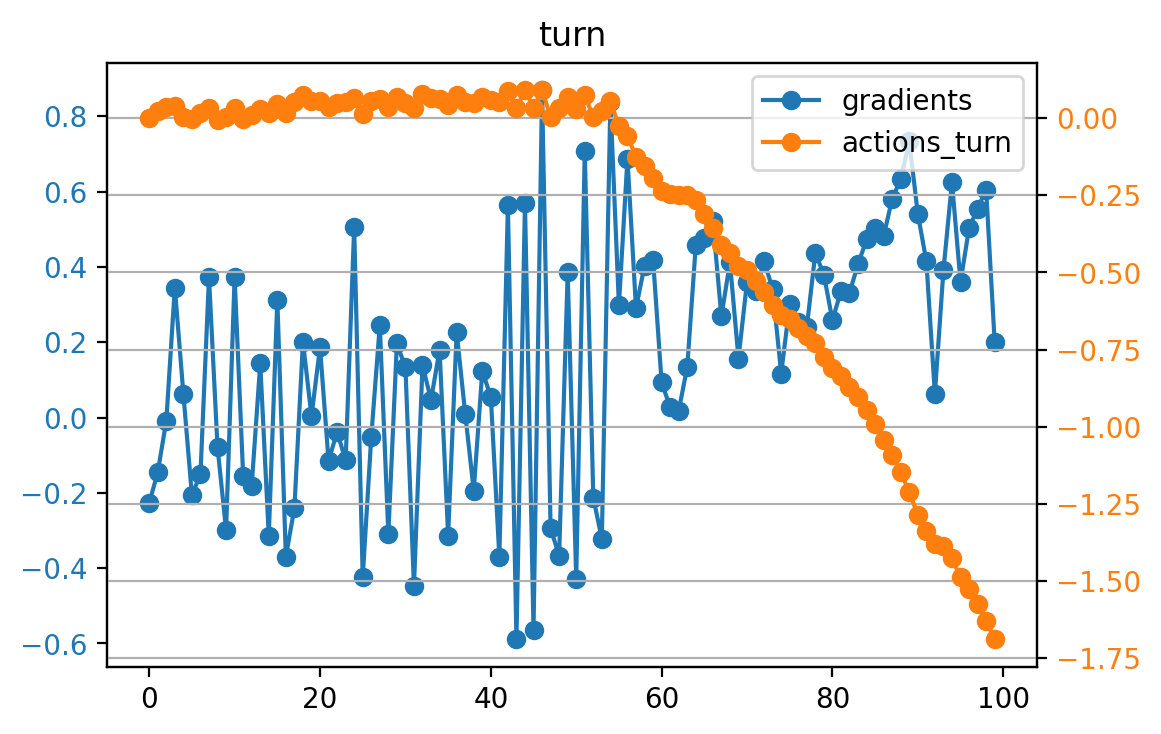

In [40]:
plt.figure(dpi=200)
a, = plt.plot(gradients_turn, 'C0-o', label='gradients')
ax1 = plt.gca()
ax2 = ax1.twinx()
b, = ax2.plot(actions_turn, 'C1-o', label='actions_turn')

ax1.tick_params(axis='y', labelcolor='C0')
ax2.tick_params(axis='y', labelcolor='C1')
plt.grid()
plt.legend(handles=(a, b))
plt.title('turn')

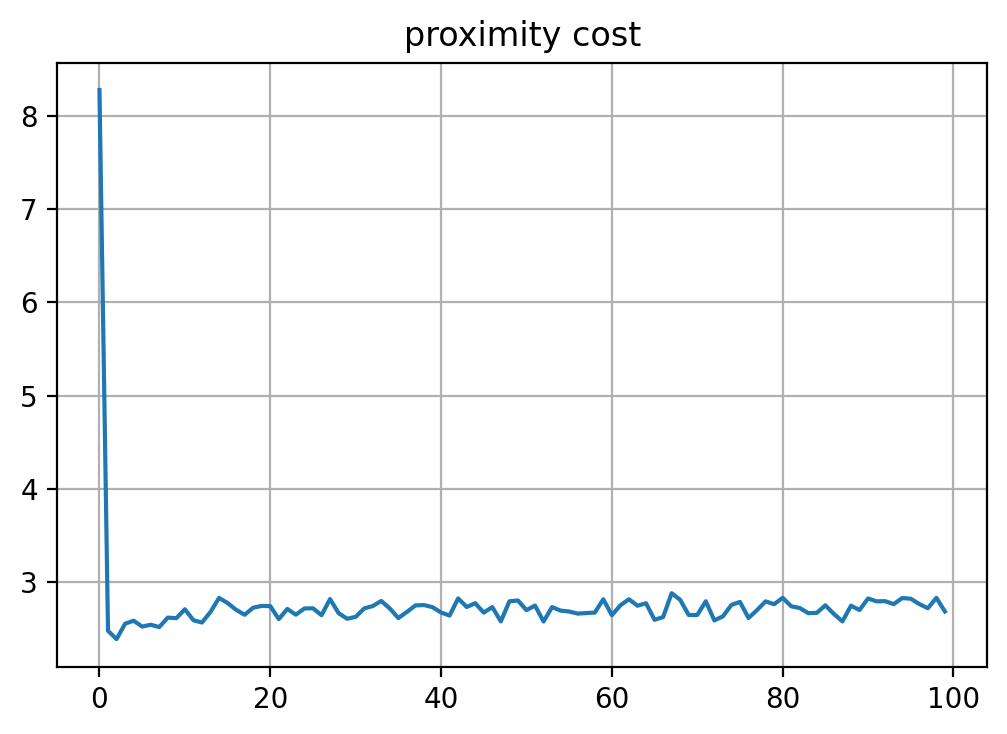

In [26]:
plt.figure(dpi=200)
plt.grid()
plt.title('proximity cost')
plt.plot(proximity_costs)

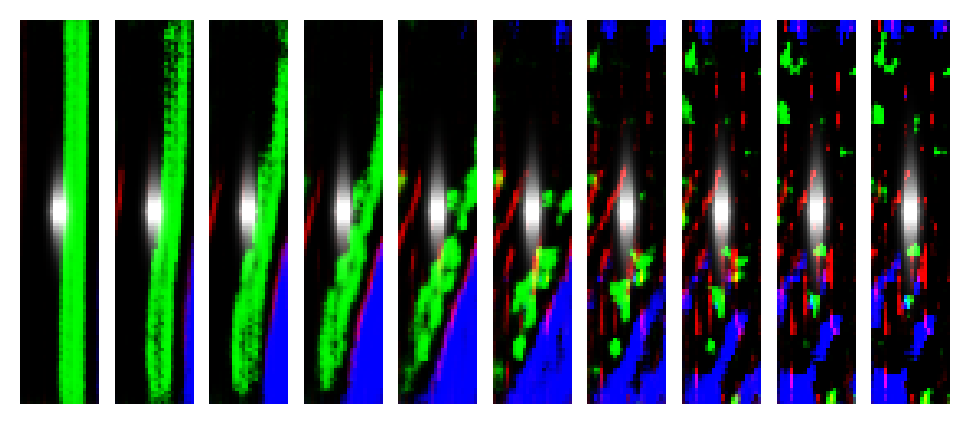

In [27]:
plot_images(images[-1])

In [168]:
## plt.plot(proximity_costs)

In [35]:
%debug

> /home/us441/vlad/miniconda3/envs/forked/lib/python3.8/site-packages/torch/autograd/__init__.py(98)backward()
     96         retain_graph = create_graph
     97 
---> 98     Variable._execution_engine.run_backward(
     99         tensors, grad_tensors, retain_graph, create_graph,
    100         allow_unreachable=True)  # allow_unreachable flag

ipdb> u
> /home/us441/vlad/miniconda3/envs/forked/lib/python3.8/site-packages/torch/tensor.py(198)backward()
    196                 products. Defaults to ``False``.
    197         """
--> 198         torch.autograd.backward(self, gradient, retain_graph, create_graph)
    199 
    200     def register_hook(self, hook):

ipdb> u
> <ipython-input-34-5851cf151c00>(10)<module>()
      8 
      9     optimizer.zero_grad()
---> 10     loss['proximity_loss'].backward()
     11     optimizer.step()
     12 

ipdb> car_in_front_actions.grad
tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0

In [252]:
car_in_front_actions.grad.mean()

tensor(0.0013, device='cuda:0')

# Same, but for vanilla model

In [253]:
VanillaModule = ppuu.lightning_modules.MPURModule
import random

config = VanillaModule.Config()
config.model_config.model_type = 'vanilla'
config.training_config.set_dataset('50')
config.training_config.epoch_size = 10
config.training_config.n_epochs = 0
config.training_config.seed = random.randint(0, 1000)
config.training_config.batch_size = 1
config.training_config.validation_size = 10
config.training_config.output_dir = '/home/us441/vlad/garbage'
config.cost_config.uncertainty_n_batches = 10 
v_model = ppuu.train_policy.main(config)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0,1]
INFO:lightning:CUDA_VISIBLE_DEVICES: [0,1]

  | Name          | Type                | Params
------------------------------------------------------
0 | forward_model | ForwardModel        | 15 M  
1 | policy_model  | DeterministicPolicy | 6 M   
INFO:lightning:
  | Name          | Type                | Params
------------------------------------------------------
0 | forward_model | ForwardModel        | 15 M  
1 | policy_model  | DeterministicPolicy | 6 M   


[estimating normal uncertainty ranges: 100.0%]



In [254]:
v_model.cuda()

Cls(
  (forward_model): ForwardModel(
    (forward_model): FwdCNN_VAE(
      (encoder): encoder(
        (f_encoder): Sequential(
          (0): Conv2d(60, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (1): Dropout2d(p=0.1, inplace=True)
          (2): LeakyReLU(negative_slope=0.2, inplace=True)
          (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
          (4): Dropout2d(p=0.1, inplace=True)
          (5): LeakyReLU(negative_slope=0.2, inplace=True)
          (6): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        )
        (s_encoder): Sequential(
          (0): Linear(in_features=80, out_features=256, bias=True)
          (1): Dropout(p=0.1, inplace=True)
          (2): LeakyReLU(negative_slope=0.2, inplace=True)
          (3): Linear(in_features=256, out_features=256, bias=True)
          (4): Dropout(p=0.1, inplace=True)
          (5): LeakyReLU(negative_slope=0.2, inplace=True)
          (6): Linear(in_featu

In [255]:
v_car_in_front_predictions = v_model.forward_model.unfold(car_in_front_actions, car_in_front_batch)
# v_car_in_front_predictions['pred_images'] = target_car_in_front
v_car_in_front_predictions['pred_actions'] = car_in_front_actions

In [256]:
loss = v_model.policy_cost.calculate_cost(batch, v_car_in_front_predictions)
car_in_front_actions.grad.data.zero_()
loss['proximity_loss'].backward()

In [257]:
print(car_in_front_actions.grad)

tensor([[[ 9.2192e-04, -1.1658e-03],
         [-8.1546e-05,  3.2839e-02],
         [ 1.8150e-04,  2.2008e-02],
         [ 5.7811e-04, -2.1045e-02],
         [ 5.1299e-04, -3.0638e-02],
         [ 5.8055e-04, -3.4569e-02],
         [ 1.5095e-04, -4.0732e-02],
         [ 5.4851e-04, -4.5562e-02],
         [ 1.9219e-04, -4.4929e-02],
         [-1.4295e-05, -3.5842e-02],
         [ 1.6629e-04, -3.6044e-02],
         [-4.9318e-05, -1.4981e-02],
         [-4.6007e-05, -2.5359e-02],
         [-1.0004e-04, -2.8495e-02],
         [ 9.4802e-05, -2.9616e-02],
         [ 4.4019e-04, -2.0987e-02],
         [ 3.0303e-04, -2.9166e-02],
         [-6.3547e-05, -1.7985e-02],
         [ 2.7450e-05, -1.4765e-02],
         [ 2.1042e-04, -2.1861e-02],
         [-9.3892e-06, -1.7343e-02],
         [ 1.8657e-04, -2.0481e-02],
         [ 1.9303e-05, -1.3784e-02],
         [ 7.2502e-05, -1.2979e-02],
         [ 6.6070e-05, -9.7094e-03],
         [ 1.6697e-04, -1.2042e-02],
         [ 1.1688e-04, -1.0384e-02],
 

In [258]:
loss['proximity_loss']

tensor(0.3198, device='cuda:0', grad_fn=<MeanBackward0>)

In [259]:
car_in_front_actions.grad.mean()

tensor(-0.0091, device='cuda:0')

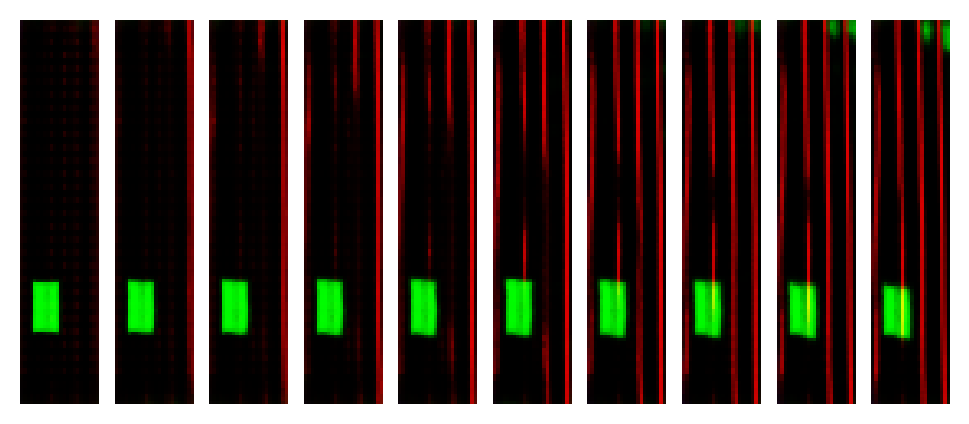

In [260]:
plot_images(v_car_in_front_predictions['pred_images'])

In [261]:
grad_v = car_in_front_actions.grad.clone()

In [262]:
grad_km.abs() - grad_v.abs()

tensor([[[-4.1454e-05,  8.7828e-03],
         [ 7.2110e-04, -2.5624e-02],
         [ 5.2174e-04, -1.4995e-02],
         [-2.0252e-05, -1.5147e-02],
         [-1.7595e-05, -2.4791e-02],
         [-1.2546e-04, -2.8850e-02],
         [ 2.5065e-04, -3.6136e-02],
         [-1.7686e-04, -4.1129e-02],
         [ 1.3311e-04, -4.0969e-02],
         [ 2.7390e-04, -3.2311e-02],
         [ 1.0054e-04, -3.3021e-02],
         [ 1.8020e-04, -1.2164e-02],
         [ 1.5634e-04, -2.2503e-02],
         [ 7.7615e-05, -2.6204e-02],
         [ 6.2081e-05, -2.7560e-02],
         [-3.1966e-04, -1.9147e-02],
         [-1.9860e-04, -2.7426e-02],
         [ 2.8453e-05, -1.6648e-02],
         [ 5.4986e-05, -1.3405e-02],
         [-1.4933e-04, -2.0734e-02],
         [ 4.1888e-05, -1.6162e-02],
         [-1.5022e-04, -1.9699e-02],
         [ 8.5652e-06, -1.3057e-02],
         [-4.9174e-05, -1.2238e-02],
         [-5.1044e-05, -9.2302e-03],
         [-1.5586e-04, -1.1547e-02],
         [-1.0914e-04, -9.9720e-03],
 

In [263]:
grad_km.mean(axis=1)

tensor([[-0.0002,  0.0028]], device='cuda:0')

In [265]:
grad_v.mean(axis=1)

tensor([[ 0.0002, -0.0183]], device='cuda:0')